# Arbre Binaire de Recherche

In [89]:
def inf(cle1,cle2):
    if((isinstance(cle1,list))):
        clef1 = cle1.copy()
        clef2 = cle2.copy()
        if ( (len(cle1) == 0) and (len(cle2) == 0)):
            return False
        c1 =  clef1.pop(0)
        c2 =  clef2.pop(0)
        if c1>c2:
            return False
        if c1<c2:
            return True
        if c1 == c2:
            return inf(clef1,clef2)
    else:
        return cle1<cle2

def eg(cle1,cle2):
    if(isinstance(cle1,list)):
        clef1 = cle1.copy()
        clef2 = cle2.copy()
        if ( (len(clef1) == 0) and (len(clef2) == 0)):
            return True
        c1 =  clef1.pop(0)
        c2 =  clef2.pop(0)
        if c1 == c2:
            return eg(clef1,clef2)
        else:
            return False
    else:
        return cle1 == cle2
    
def conv():
    l = [] #liste des clés convertis
    with open("cles_alea/jeu_1_nb_cles_100.txt","r") as f:
        for line in f.readlines():
            tmp = [] #liste temporaire
            ch = line.strip()[2:]
            str1 = ch[0:8]
            tmp.append(int(str1,16))
            str2 = ch[8:16]
            tmp.append(int(str2,16))
            str3 = ch[16:24]
            tmp.append(int(str3,16))
            str4 = ch[24:32]
            tmp.append(int(str4,16))
            l.append(tmp)
    return l

def convP(num_jeu,nb_cles):
    l = [] #liste des clés convertis
    with open("cles_alea/jeu_" + str(num_jeu) + "_nb_cles_"+ str(nb_cles) +".txt","r") as f:
        for line in f.readlines():
            tmp = [] #liste temporaire
            ch = line.strip()[2:]
            str1 = ch[0:8]
            tmp.append(int(str1,16))
            str2 = ch[8:16]
            tmp.append(int(str2,16))
            str3 = ch[16:24]
            tmp.append(int(str3,16))
            str4 = ch[24:32]
            tmp.append(int(str4,16))
            l.append(tmp)
    return l

In [94]:
import graphviz as gv
import math as m
import os as file

class ArbreBinaire:
    def __init__(self, e, ssAG, ssAD):
        self.pere = None # ArbreBinaire Parent
        self.ssAG = ssAG # ArbreBinaire Gauche 
        self.ssAD = ssAD # ArbreBinaire Droit 
        self.cle = e # clé de l'ABR
        self.taille = 1
    
    def est_feuille(self):
        # Renvoi vrai si l'arbre est une feuille
        return ((self.ssAG == None) and (self.ssAD == None))
    
    def ArbreVide():
        # Renvoi un ArbreBinaire vide
        return ArbreBinaire(None, None, None)
    
    def ArbreBinaire(e, G, D):
        # cle * ArbreBinaire * ArbreBinaire -> ArbreBinaire
        # Renvoi l'Arbre Binaire dont la racine a pour contenu e, et pour fils gauche et droit (G et D)
        A = ArbreBinaire(None, None, None)
        A.cle = e
        A.ssAG = G
        A.ssAD = D
        A.ssAG.pere = A
        A.ssAD.pere = A
        return A
    
    def EstArbreVide(A):
        # ArbreBinaire -> boolean
        # Renvoi vrai ssi l'arbre A est vide
        if(A.cle is None):
            return True
        else:
            return False
        
    def Racine(A):
        # ArbreBinaire -> cle
        # Renvoi le contenu de la racine de A
        return A.cle
    
    def SousArbreGauche(A):
        # ArbreBinaire -> ArbreBinaire
        # Renvoi une copie du sous-arbre gauche de l'arbre A
        A = A.ssAG
        return A
    
    def SousArbreDroit(A):
        # ArbreBinaire -> ArbreBinaire
        # Renvoi une copie du sous-arbre droit de l'arbre A
        A = A.ssAD
        return A
    
    def Pere(A):
        # ArbreBinaire -> ArbreBinaire
        # Renvoi l'arbre dont A est un des fils de la racine sinon vide.
        if(A.pere is None):
            return ArbreBinaire.ArbreVide()
        else:
            return A.pere
        
    def ABR_Ajout (e, A):
        # clé ∗ ArbreBinaire −> ArbreBinaire
        # Renvoie l’arbre resultant de l’ajout d'une cle dans A
        if ArbreBinaire.EstArbreVide (A):
            return ArbreBinaire (e, ArbreBinaire.ArbreVide (), ArbreBinaire.ArbreVide ())
        elif eg(e,ArbreBinaire.Racine(A)):
            return A
        elif inf(e,ArbreBinaire.Racine(A)):
            return ArbreBinaire (ArbreBinaire.Racine(A), 
                                 ArbreBinaire.ABR_Ajout(e, ArbreBinaire.SousArbreGauche (A)), ArbreBinaire.SousArbreDroit (A))
        else:
            return ArbreBinaire (ArbreBinaire.Racine(A), 
                                 ArbreBinaire.SousArbreGauche (A), ArbreBinaire.ABR_Ajout(e, ArbreBinaire.SousArbreDroit (A)))
        
    def ABR_recherche(e, A):
        # clé ∗ ArbreBinaire −> boolean
        # Renvoie vrai si la clé e est dans l'arbre A
        if ArbreBinaire.EstArbreVide (A):
            return False
        elif eg(e,ArbreBinaire.Racine(A)):
            return True
        elif inf(e,ArbreBinaire.Racine(A)):
            return ArbreBinaire.ABR_recherche(e,A.ssAG)
        else:
            return ArbreBinaire.ABR_recherche(e,A.ssAD)
    
        
    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.to_graph(gtree,str(self.cle))
    
    def to_graph(self, g,prefixe):
        # Construit une représentation de l'arbre pour pouvoir l'afficher
        if self.est_feuille():
            g.node(prefixe,str(self.cle),shape='ellipse', **{'width':str(0.1), 'height':str(0.1)})
        else:
            g.node(prefixe,str(self.cle),shape='ellipse', **{'width':str(0.1), 'height':str(0.1)})
            if not(self.ssAG is None):
                self.ssAG.to_graph(g,prefixe+"g")
                g.edge(prefixe,prefixe+"g")
            if not(self.ssAD is None):
                self.ssAD.to_graph(g,prefixe+"d")
                g.edge(prefixe,prefixe+"d")
        return g

# Test

Recherche de [3997414825, 2348862555, 711511147, 624901081] : True
Recherche de [2997685176, 1358318026, 1642171234, 3764001564] : True
Recherche de [2997685176, 10000000, 1642171234, 1000000000] : False


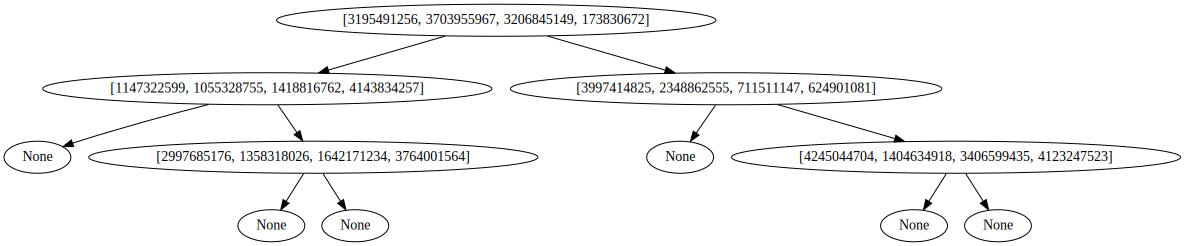

In [101]:
L = convP(1,5)
A = ArbreBinaire(None,None,None)
for e in L:
    A = ArbreBinaire.ABR_Ajout(e, A)
    
e1 = [3997414825,2348862555,711511147,624901081]
e2 = [2997685176,1358318026,1642171234,3764001564]
e3 = [2997685176,10000000,1642171234,1000000000]

print("Recherche de " + str(e1) + " : " + str(ArbreBinaire.ABR_recherche(e1, A)))
print("Recherche de " + str(e2) + " : " + str(ArbreBinaire.ABR_recherche(e2, A)))
print("Recherche de " + str(e3) + " : " + str(ArbreBinaire.ABR_recherche(e3, A)))
    
A.plot()